In [1]:
# This notebook was built in Catherine's vectorenv
import pandas as pd
from pandas import DataFrame
import numpy as np
import os
import glob
import datetime
import pylab
import matplotlib as plt
import datetime as datetime  
import statsmodels.api as sm  
import matplotlib.pyplot as plt
import seaborn as sns
from ggplot import *



# plt.style.use('ggplot')

/Users/ckuhn/anaconda2/envs/vectorenv/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/ckuhn/anaconda2/envs/vectorenv/lib/python2.7/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/ckuhn/anaconda2/envs/vectorenv/lib/python2.7/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


In [2]:
%matplotlib inline

In [3]:
path =r'/Users/ckuhn/Documents/DFO_Accuracy/data/MODIS_only' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pd.concat(list_)

In [4]:
frame = frame.drop(['system:index','.geo'], axis=1)

In [5]:
frame.head()

,Flood Algorithm,Flood ID,accuracy,fMeasure,fn,fp,precision,recall,tn,tp
0,MODIS,1,0.985255,0.950298,66,34,0.965657,0.935421,5726,956
1,MODIS_Otsu,1,0.985255,0.950298,66,34,0.965657,0.935421,5726,956
2,Landsat,1,0.985255,0.950298,66,34,0.965657,0.935421,5726,956
0,MODIS,10,0.949827,0.938001,228,4,0.997726,0.885023,2637,1755
1,MODIS_Otsu,10,0.949827,0.938001,228,4,0.997726,0.885023,2637,1755


In [6]:
# Filter to the MODIS outputs as those are the only valid ones we have right now. 
frame = frame.loc[frame['Flood Algorithm'] == 'MODIS']

In [7]:
# Check the filter. 
len(frame['Flood Algorithm'].unique())

1

In [8]:
stats = pd.melt(frame, id_vars=['Flood Algorithm','Flood ID'], var_name='Metric', value_name = 'Score')
stats.head(5)

,Flood Algorithm,Flood ID,Metric,Score
0,MODIS,1,accuracy,0.985255
1,MODIS,10,accuracy,0.949827
2,MODIS,11,accuracy,0.834451
3,MODIS,12,accuracy,0.976815
4,MODIS,13,accuracy,0.974188


In [9]:
stats.groupby('Metric').describe()

Flood ID                                                   Score  \
             count       mean       std  min   25%   50%   75%   max count   
Metric                                                                       
accuracy      14.0  10.642857  5.956343  1.0  5.25  11.5  15.5  19.0  14.0   
fMeasure      14.0  10.642857  5.956343  1.0  5.25  11.5  15.5  19.0  14.0   
fn            14.0  10.642857  5.956343  1.0  5.25  11.5  15.5  19.0  14.0   
fp            14.0  10.642857  5.956343  1.0  5.25  11.5  15.5  19.0  14.0   
precision     14.0  10.642857  5.956343  1.0  5.25  11.5  15.5  19.0  14.0   
recall        14.0  10.642857  5.956343  1.0  5.25  11.5  15.5  19.0  14.0   
tn            14.0  10.642857  5.956343  1.0  5.25  11.5  15.5  19.0  14.0   
tp            14.0  10.642857  5.956343  1.0  5.25  11.5  15.5  19.0  14.0   

                                                                              \
                   mean           std          min          25%          50%   
Metric                                                                         
accuracy       0.948096      0.055524     0.825337     0.954240     0.972825   
fMeasure       0.740754      0.274738     0.000000     0.678889     0.863783   
fn           384.714286    716.667547     7.000000    63.000000   118.000000   
fp           208.428571    380.890599     2.000000    34.750000    61.500000   
precision      0.774390      0.298797     0.000000     0.791461     0.903936   
recall         0.755538      0.281497     0.000000     0.717011     0.872433   
tn         11605.000000  15270.893652  1292.000000  3723.500000  5846.500000   
tp          1544.857143   1860.392426     0.000000   641.750000  1361.000000   

                                      
                   75%           max  
Metric                                
accuracy      0.981441      0.985819  
fMeasure      0.907036      0.950298  
fn          246.000000   2614.000000  
fp          130.500000   1439.000000  
precision     0.964494      0.997726  
recall        0.917983      0.987761  
tn         9609.500000  54125.000000  
tp         1588.000000   7559.000000

In [10]:
precRecall = stats.loc[stats['Metric'].isin(['precision','recall'])]
precRecall['Score']  = precRecall['Score'].multiply(100)
precRecall.groupby('Metric').describe()

/Users/ckuhn/anaconda2/envs/vectorenv/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Flood ID                                                   Score  \
             count       mean       std  min   25%   50%   75%   max count   
Metric                                                                       
precision     14.0  10.642857  5.956343  1.0  5.25  11.5  15.5  19.0  14.0   
recall        14.0  10.642857  5.956343  1.0  5.25  11.5  15.5  19.0  14.0   

                                                                       \
                mean        std  min        25%        50%        75%   
Metric                                                                  
precision  77.439014  29.879726  0.0  79.146127  90.393581  96.449437   
recall     75.553785  28.149681  0.0  71.701133  87.243348  91.798259   

                      
                 max  
Metric                
precision  99.772598  
recall     98.776098

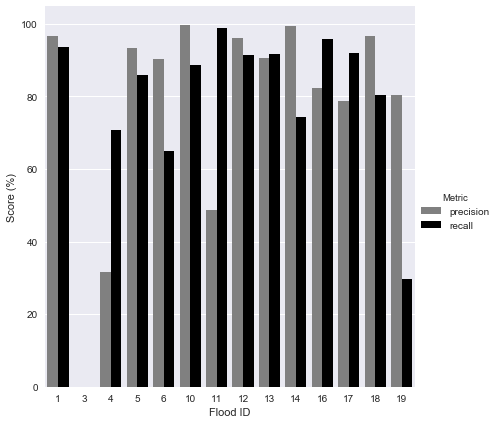

In [11]:
# Draw a nested barplot to show survival for class and sex
flatui = ["grey", "black"]

g = sns.factorplot(x="Flood ID", y="Score", hue="Metric", data=precRecall,
                   size=6, kind="bar", palette= flatui)
g.despine(left=True)
g.set_ylabels("Score (%)")

In [12]:
confusionMatrix = stats.loc[stats['Metric'].isin(['fn','fp',  'tp'])]
confusionMatrix.groupby('Metric').describe()

Flood ID                                                   Score  \
          count       mean       std  min   25%   50%   75%   max count   
Metric                                                                    
fn         14.0  10.642857  5.956343  1.0  5.25  11.5  15.5  19.0  14.0   
fp         14.0  10.642857  5.956343  1.0  5.25  11.5  15.5  19.0  14.0   
tp         14.0  10.642857  5.956343  1.0  5.25  11.5  15.5  19.0  14.0   

                                                                       
               mean          std  min     25%     50%     75%     max  
Metric                                                                 
fn       384.714286   716.667547  7.0   63.00   118.0   246.0  2614.0  
fp       208.428571   380.890599  2.0   34.75    61.5   130.5  1439.0  
tp      1544.857143  1860.392426  0.0  641.75  1361.0  1588.0  7559.0

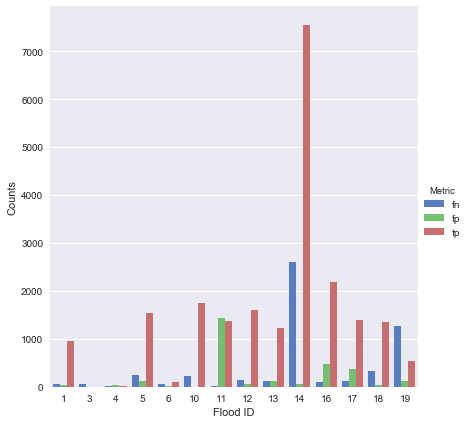

In [13]:
# Draw a nested barplot to show survival for class and sex
g = sns.factorplot(x="Flood ID", y="Score", hue="Metric", data=confusionMatrix,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Counts")